In [20]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import matplotlib.pyplot as plt 

In [2]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 12), 
            nn.ReLU(True), 
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28 * 28), 
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
mnist_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0, 1.0),
    transforms.CenterCrop((28))
])

In [4]:
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

In [5]:
mnist= datasets.MNIST(root='./../data', train=True,download=False, transform=mnist_trans)
mnist = torch.utils.data.random_split(mnist, [10000, len(mnist)-10000])[0] # gets split into two parts [10k and 50k] and we slice 0 index.

In [6]:
dataloader = DataLoader(mnist,batch_size=batch_size)

In [9]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

torch.set_default_dtype(torch.float64)
torch.set_default_device(device)

Using PyTorch version: 2.1.0.dev20230622+cu121  Device: cuda


In [30]:

def to_img(x):
    x = x[0]
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    
    x = x.view( 28, 28)
    return x

epoch [1/100], loss:0.0635


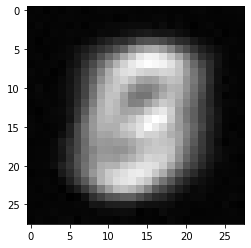

epoch [2/100], loss:0.0595
epoch [3/100], loss:0.0572
epoch [4/100], loss:0.0518
epoch [5/100], loss:0.0489
epoch [6/100], loss:0.0470
epoch [7/100], loss:0.0442
epoch [8/100], loss:0.0420
epoch [9/100], loss:0.0409
epoch [10/100], loss:0.0401
epoch [11/100], loss:0.0395


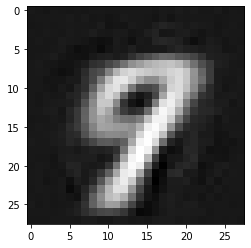

epoch [12/100], loss:0.0387
epoch [13/100], loss:0.0381
epoch [14/100], loss:0.0374
epoch [15/100], loss:0.0369
epoch [16/100], loss:0.0364
epoch [17/100], loss:0.0362
epoch [18/100], loss:0.0360
epoch [19/100], loss:0.0355
epoch [20/100], loss:0.0351
epoch [21/100], loss:0.0348


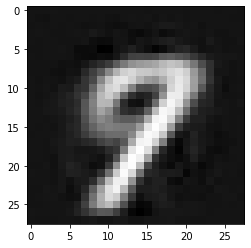

epoch [22/100], loss:0.0345
epoch [23/100], loss:0.0342
epoch [24/100], loss:0.0341
epoch [25/100], loss:0.0337
epoch [26/100], loss:0.0337
epoch [27/100], loss:0.0334
epoch [28/100], loss:0.0333
epoch [29/100], loss:0.0330
epoch [30/100], loss:0.0329
epoch [31/100], loss:0.0327


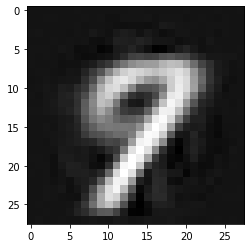

epoch [32/100], loss:0.0324
epoch [33/100], loss:0.0322
epoch [34/100], loss:0.0322
epoch [35/100], loss:0.0316
epoch [36/100], loss:0.0317
epoch [37/100], loss:0.0313
epoch [38/100], loss:0.0314
epoch [39/100], loss:0.0314
epoch [40/100], loss:0.0312
epoch [41/100], loss:0.0310


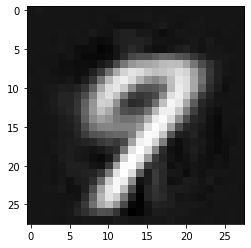

KeyboardInterrupt: 

In [33]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:

        img, _ = data
        img = img.view(img.size(0), -1)
        
        output = model(img.cuda())
        loss = criterion(output, img.cuda())
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        plt.imshow(pic,cmap='gray')
        plt.show()
        # save_image(pic, './mlp_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')